## 第2讲 基于观测器的残差生成

### 例1. 开环稳定系统直接利用系统的模型生成残差

#### 定义系统参数

导入numpy模块

In [1]:
import numpy as np

系统参数矩阵
$$
A = \begin{bmatrix}
0 & 1\\
-2 & -1
\end{bmatrix}, 
B = \begin{bmatrix}
 0 \\
 1
\end{bmatrix},
C = \begin{bmatrix}
1 & 0
\end{bmatrix},
F = \begin{bmatrix}
 0 \\
 1
\end{bmatrix}
$$

In [2]:
A = np.array([[0,1],
              [-2,-1]])
B = np.array([[0],[1]])
C = np.array([[1,0]])
F = np.array([[0],[1]])
n_x = A.shape[0]
n_u = B.shape[1]
n_f = F.shape[1]
n_y = C.shape[0]

#### 设置仿真时间

In [3]:
t_max = 10
dt = 0.01
tspan = np.arange(0, t_max, dt) 
Nk = len(tspan)

#### 预定义数据存储数组

In [4]:
x = np.zeros((n_x,Nk))
xhat = np.zeros((n_x,Nk))
u = np.zeros((n_u,Nk))
y = np.zeros((n_y,Nk))
yhat = np.zeros((n_y,Nk))
r = np.zeros((n_y,Nk))

#### 变量初始化 
变量初值
$$ 
x(0) = \begin{bmatrix} 
0 \\
0.01
\end{bmatrix} ,
\hat{x}(0) = \begin{bmatrix} 
0 \\
0
\end{bmatrix} ,
y(0) = Cx(0),
$$
$$ 
\hat{y}(0) = C\hat{x}(0),
u(0) = 1 ,
r(0) = y(0) - \hat{y}(0)
$$

In [5]:
x[:,[0]] = np.array([[0],[0.01]]) 
xhat[:,[0]] = np.array([[0],[0]]) 
y[:,[0]] = C@x[:,[0]]
yhat[:,[0]] = C@xhat[:,[0]]
u[:,[0]] = 1
r[:,[0]] = y[:,[0]] - yhat[:,[0]]

#### 进行数值仿真 
仿真实际系统
$$
\left\{
\begin{array}{l}
\dot{x}(t) = Ax(t) + Bu(t) + Ff(t) \\
y(t) = Cx(t)
\end{array}
\right.
$$
系统模型
$$
\left\{
\begin{array}{l}
\dot{\hat{x}}(t) = A\hat{x}(t) + Bu(t) \\
\hat{y}(t) = C\hat{x}(t)
\end{array}
\right.
$$  
残差
$$
r(t) = y(t) - \hat{y}(t)
$$  

In [6]:
for k in range(1,Nk):
    # 仿真实际系统
    # 无故障
    # f = 0
    
    if dt * k > 5: # t>5时发生故障
        f = 1
    else:
        f = 0
    
    dx = A@x[:,[k-1]] + B@u[:,[k-1]] + F*f
    x[:,[k]] = x[:,[k-1]] + dx*dt
    y[:,[k]] = C@x[:,[k]]
    u[:,[k]] = 1

    # 系统模型
    dxhat = A@xhat[:,[k-1]] + B@u[:,[k-1]];
    xhat[:,[k]] = xhat[:,[k-1]] + dxhat*dt;
    yhat[:,[k]] = C@xhat[:,[k]];

    # 残差
    r[:,[k]] = y[:,[k]] - yhat[:,[k]];

#### 画图

In [7]:
# 导入matplotlib模块中的pyplot函数
import matplotlib.pyplot as plt

画残差r的曲线

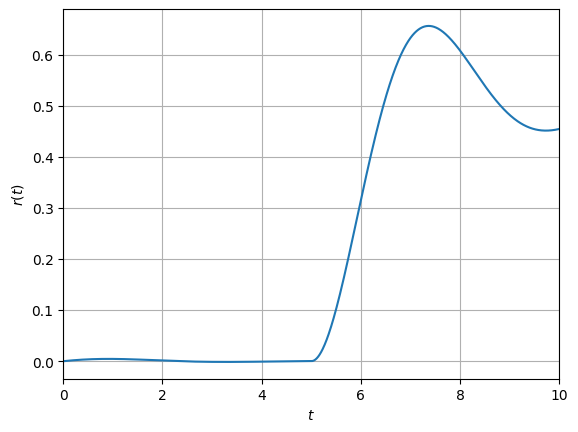

In [8]:
plt.figure()
plt.plot(tspan,r[[0],:].T)
plt.xlim([0,t_max])
plt.xlabel('$t$')
plt.ylabel('$r(t)$')
plt.grid()
plt.show()